In [2]:
# Cannot use Cuda Toolkit to run my model on my GPU since my GPU isn't a CUDA-Capaable GPU
# To check if GPU is CUDA-Capable, visit :
# https://docs.nvidia.com/cuda/cuda-installation-guide-microsoft-windows/index.html#:~:text=2.1.,-Verify%20You%20Have&text=You%20can%20verify%20that%20you,that%20GPU%20is%20CUDA%2Dcapable.
# If GPU is CUDA compatible then use this youtube video as an installation guide:
# https://www.youtube.com/watch?v=hHWkvEcDBO0&ab_channel=AladdinPersson

import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
# we will use Inception V3 for our application 
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

In [131]:
# Data pre-processing and initiazling paths and variables
train_path = 'Datasets/train'
val_path = 'Datasets/val'

train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip = True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale = 1/255)

train_set = train_datagen.flow_from_directory(
    train_path,
    target_size = (299, 299),
    batch_size = 32,
    class_mode = 'categorical'
)

for i in os.listdir("Datasets/train/"):
    print(str(len(os.listdir("Datasets/train/" +i))) +" "+ i +" images")

val_set = val_datagen.flow_from_directory(
    val_path,
    target_size = (299, 299),
    batch_size = 32, 
    class_mode = 'categorical'                                             
)

for i in os.listdir("Datasets/val/"):
    print(str(len(os.listdir("Datasets/val/" +i))) +" "+ i +" images")

classlabel_map = (train_set.class_indices)
print(classlabel_map)

Found 1951 images belonging to 4 classes.
288 diseased cotton leaf images
815 diseased cotton plant images
427 fresh cotton leaf images
421 fresh cotton plant images
Found 253 images belonging to 4 classes.
43 diseased cotton leaf images
78 diseased cotton plant images
66 fresh cotton leaf images
66 fresh cotton plant images
{'diseased cotton leaf': 0, 'diseased cotton plant': 1, 'fresh cotton leaf': 2, 'fresh cotton plant': 3}


In [163]:
# Model - Inception V3
inception = InceptionV3(weights='imagenet', include_top=False, 
                        input_tensor=Input(shape=(299, 299, 3)))
#include_top = false means that we are removing the top layer because we want to set out own image size

# don't train all the layers - we want to use the existing weights in Inception Model except top and last layer
for layer in inception.layers:
    layer.trainable = False

flatten = tf.keras.layers.Flatten()(inception.output)
output = tf.keras.layers.Dense(4, activation='softmax')(flatten)

# creating a model object
model = Model(inputs=inception.input, outputs=output)

In [164]:
# Defining optimizer, loss function, metrics and 
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 149, 149, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 149, 149, 32) 96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 149, 149, 32) 0           batch_normalization_188[0][0]    
____________________________________________________________________________________________

In [162]:
history = model.fit(train_set, validation_data=val_set, epochs=20, 
                    steps_per_epoch=len(train_set), validation_steps=len(val_set))

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 61 steps, validate for 8 steps
Epoch 1/20
 4/61 [>.............................] - ETA: 22:56 - loss: 3.2171 - accuracy: 0.8542

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Mrudul\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-162-385e73f84c24>", line 2, in <module>
    steps_per_epoch=len(train_set), validation_steps=len(val_set))
  File "C:\Users\Mrudul\Anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\training.py", line 819, in fit
    use_multiprocessing=use_multiprocessing)
  File "C:\Users\Mrudul\Anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\training_v2.py", line 342, in fit
    total_epochs=epochs)
  File "C:\Users\Mrudul\Anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\training_v2.py", line 128, in run_one_epoch
    batch_outs = execution_function(iterator)
  File "C:\Users\Mrudul\Anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\training_v2_utils.py", line 98, in execution_function
    distributed_function(input_fn))
  Fi

KeyboardInterrupt: 

In [83]:
#saving model
tf.keras.models.save_model(model,'model_InceptionV5.hdf5')

In [84]:
# loading saved model
from tensorflow.keras.models import load_model

saved_model = load_model('model_InceptionV5.hdf5')

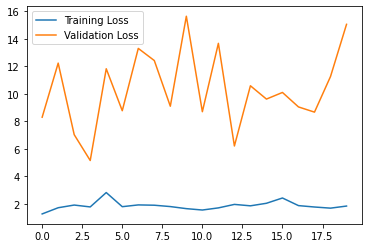

In [114]:
#Plotting loss
plt.plot(history.epoch, history.history['loss'], label='Training Loss')
plt.plot(history.epoch, history.history['val_loss'], label='Validation Loss')
plt.legend()

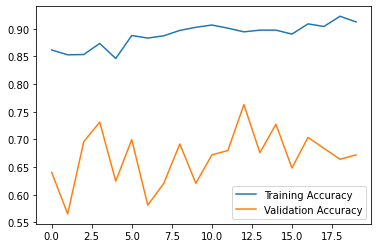

In [115]:
# Plotting Accuracy

x_axis = range(epochs)

plt.plot(history.epoch, history.history['accuracy'], label='Training Accuracy')
plt.plot(history.epoch, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

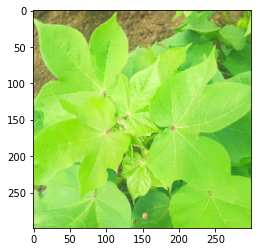

In [147]:
#Testing Sample images from "test" dataset

#img_path = "./Datasets/test/diseased cotton leaf/dis_leaf (206)_iaip.jpg"
#img_path = "./Datasets/test/diseased cotton plant/dd (29)_iaip.jpg"
#img_path = "./Datasets/test/fresh cotton leaf/d (61)_iaip - Copy.jpg"
img_path = "./Datasets/test/fresh cotton plant/dsd (518)_iaip.jpg"

img = image.load_img(img_path, target_size=(299, 299))

plt.imshow(img)
plt.show()

In [160]:
img_array = image.img_to_array(img)
img_array = img_array/255 #Normalization
print(img_array.shape)

img_batch = np.expand_dims(img_array, axis=0)
print(img_batch.shape)

print(classlabel_map)

(299, 299, 3)
(1, 299, 299, 3)
{'diseased cotton leaf': 0, 'diseased cotton plant': 1, 'fresh cotton leaf': 2, 'fresh cotton plant': 3}


In [161]:
#result = saved_model.predict(img_preprocessed).round(3) # predict diseased palnt or not
#print('Raw result = ', result)

result = saved_model.predict(img_batch)
print(result)

if result[0][3].round() == 1:
    prediction = 'fresh cotton plant'
elif result[0][2].round() == 1:
    prediction = 'fresh cotton leaf'
elif result[0][1].round() == 1:
    prediction='diseased cotton plant'
elif result[0][0].round() == 1:
    prediction = 'diseased cotton leaf'
else:
    prediction = 'Unknown'
    
print(prediction)

#pred = np.argmax(saved_model.predict(img_preprocessed), axis=1)
#prediction = saved_model.predict(img_preprocessed)
#print(np.round(prediction, decimals=3))

[[0. 0. 0. 1.]]
fresh cotton plant


In [168]:
val_pred = saved_model.predict(val_set)

In [172]:
arr = np.argmax(val_pred, axis=1)
print(arr)

[2 3 2 3 1 3 3 1 2 2 2 2 1 2 2 3 1 1 3 3 1 1 3 1 3 2 1 1 3 3 1 2 2 3 3 3 2
 3 1 1 1 3 3 3 1 1 3 3 1 1 3 2 3 3 3 1 1 3 3 1 1 2 1 2 1 2 3 3 1 3 2 1 3 1
 1 2 2 1 3 3 1 1 2 1 3 2 3 1 3 3 3 3 1 1 1 3 2 1 2 1 1 2 2 3 2 1 3 2 1 2 3
 2 3 3 2 3 1 2 1 2 3 1 3 3 3 3 2 1 3 1 3 2 1 3 1 3 1 1 2 1 1 3 3 3 3 3 3 1
 1 2 1 3 2 3 1 1 2 2 3 1 1 1 3 1 3 2 1 3 2 1 2 1 2 1 3 3 1 1 1 1 1 3 2 2 1
 3 1 2 1 2 3 1 1 3 2 3 1 3 1 2 1 1 3 3 1 1 3 3 3 3 3 2 2 1 2 1 3 3 3 3 3 1
 3 1 3 3 3 2 1 1 1 3 1 1 2 2 2 3 1 1 2 3 3 2 3 1 3 2 2 1 3 1 1]


In [ ]:
val_pred.size